# 回归分析

In [1]:
import pandas as pd
import numpy as np
# 线性回归
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', font='simhei')
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib
matplotlib.rcParams['axes.unicode_minus']=False

In [2]:
path = r'D:\Zhejiang University\Graduate Project\TransMode\Questionnaire\data.csv'
person_path = r'D:\Zhejiang University\Graduate Project\Data\Data\person.csv'
data = pd.read_csv(path)
person = pd.read_csv(person_path)
data.head()

,Unnamed: 0,用户ID,星期,日期,Trip_ID,出行目的,第几次出行,出发地点,到达地点,出发时间,...,电动车保有,汽车保有,校内主要出行方式,校外主要出行方式,修正后出发地点,修正后到达地点,s2e,start_gps,end_gps,distance
0,0,04D0BF86-23A4-498C-8DAD-1984B238772C,Thu,2018/04/17,04D0BF86-23A4-498C-8DAD-1984B238772C0001,4,1,翠柏二舍,安中大楼B,7:40,...,2,2,1-2,1-2-7-8-9,翠柏2,安中大楼B,翠柏-->安中大楼,"120.086135,30.309519","120.083456,30.301339",1172
1,1,04D0BF86-23A4-498C-8DAD-1984B238772C,Thu,2018/04/17,04D0BF86-23A4-498C-8DAD-1984B238772C0002,3,2,安中大楼B,风味食堂,11:15,...,2,2,1-2,1-2-7-8-9,安中大楼B,生活区大食堂,安中大楼-->生活区大食堂,"120.083456,30.301339","120.084257,30.308133",851
2,2,04D0BF86-23A4-498C-8DAD-1984B238772C,Thu,2018/04/17,04D0BF86-23A4-498C-8DAD-1984B238772C0003,6,3,风味食堂,翠柏二舍,11:40,...,2,2,1-2,1-2-7-8-9,生活区大食堂,翠柏2,生活区大食堂-->翠柏,"120.084257,30.308133","120.086135,30.309519",263
3,3,04D0BF86-23A4-498C-8DAD-1984B238772C,Thu,2018/04/17,04D0BF86-23A4-498C-8DAD-1984B238772C0004,4,4,翠柏二舍,安中大楼B,14:15,...,2,2,1-2,1-2-7-8-9,翠柏2,安中大楼B,翠柏-->安中大楼,"120.086135,30.309519","120.083456,30.301339",1172
4,4,04D0BF86-23A4-498C-8DAD-1984B238772C,Thu,2018/04/17,04D0BF86-23A4-498C-8DAD-1984B238772C0005,2,5,安中大楼B,西2,14:37,...,2,2,1-2,1-2-7-8-9,安中大楼B,西区教学楼2,安中大楼-->西区教学楼2,"120.083456,30.301339","120.084998,30.301415",160


C:\Users\yuhao\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


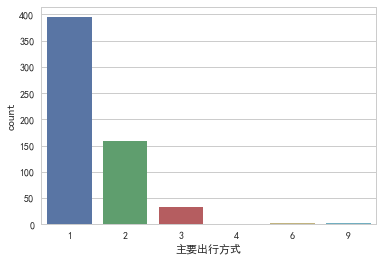

In [3]:
sns.countplot(x='主要出行方式', data=data)

## 预测主要出行方式
- 主要出行方式为1,2,3,4,6,9
- 选取特征：出行目的，出发时间，性别，年龄，宿舍取，年级，专业，自行车保有，电动车保有，汽车保有，校内主要出行方式，校外主要出行方式
- 专业大类需要转化成数字
- 出发时间需要按时间段划分
- 校内主要出行方式和校外主要出行方式使用向量表示

### 1.出发时间
按照上课时间划分:6:30前,6:30-8:00,8:00-9:35,9:35-9:50,9:50-11:25,11:25-13:15,13:15-14:05,14:05-15:40,15:40-15:55,15:55-17:30,17:30-18:30,18:30-20:05,20:05-20:55,20:55-22:30,22:30-23:30,23:30-次日6:30

In [4]:
time_list = ['6:31-8:00', '8:01-9:35', '9:36-9:50', '9:51-11:25', '11:26-13:15', '13:16-14:05', '14:06-15:40', '15:41-15:55', 
             '15:51-17:30', '17:31-18:30', '18:31-20:05', '20:06-20:55', '20:56-22:30', '22:31-23:30', '23:31-24:00', '0:01-6:30']

def calculate_time(time_list):
    discrete = list()
    for time in time_list:
        start, end = time.split('-')
        start_hour, start_minute = start.split(':')
        end_hour, end_minute = end.split(':')
        start_minutes = int(start_hour) * 60 + int(start_minute)
        end_minutes = int(end_hour) * 60 + int(end_minute)
        discrete.append((start_minutes, end_minutes))
    return discrete
discrete = calculate_time(time_list)

def discrete_time(time):
    """
    把时间按划分好间隔分配
    """
    time_list = ['6:31-8:00', '8:01-9:35', '9:36-9:50', '9:51-11:25', '11:26-13:15', '13:16-14:05', '14:06-15:40', '15:41-15:55', 
             '15:51-17:30', '17:31-18:30', '18:31-20:05', '20:06-20:55', '20:56-22:30', '22:31-23:30', '23:31-24:00', '0:01-6:30']
    discrete = calculate_time(time_list)
    hour, minute = time.split(':')
    hour = int(hour)
    minute = int(minute)
    if hour == 24 and minute > 0:
        hour -= 24
    minutes = hour * 60 + minute
    for i in range(len(discrete)):
        if minutes >= discrete[i][0] and minutes <= discrete[i][1]:
            return i

In [5]:
data['time'] = data['出发时间'].apply(discrete_time)
data['time'].astype('int')

0       0
1       3
2       4
3       6
4       6
5       8
6      12
7       0
8       3
9       4
10      5
11      8
12      8
13     10
14     11
15     12
16      1
17      1
18      1
19      1
20      4
21      4
22      8
23      8
24      9
25     10
26      0
27      1
28      3
29      8
       ..
562     1
563     1
564     4
565     4
566     7
567     7
568     9
569     0
570     0
571     4
572     5
573     8
574    10
575    10
576     0
577     3
578     5
579     7
580    12
581     0
582     1
583     3
584     4
585    12
586     0
587     3
588     4
589     5
590     7
591    12
Name: time, Length: 592, dtype: int32

### 2.专业大类
将专业大类转化编号

C:\Users\yuhao\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


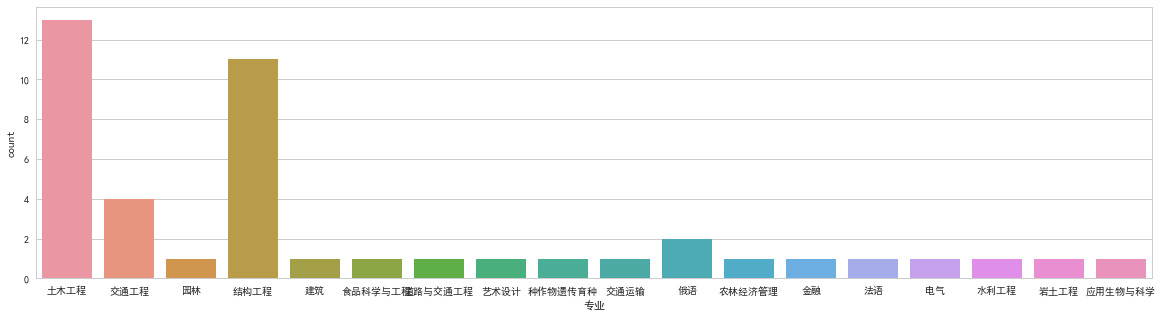

In [6]:
ax = plt.subplots(figsize=(20, 5))
sns.countplot(x='专业', data=person)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592 entries, 0 to 591
Data columns (total 46 columns):
Unnamed: 0    592 non-null int64
用户ID          592 non-null object
星期            592 non-null object
日期            592 non-null object
Trip_ID       592 non-null object
出行目的          592 non-null int64
第几次出行         592 non-null int64
出发地点          592 non-null object
到达地点          592 non-null object
出发时间          592 non-null object
达到时间          592 non-null object
出发时           592 non-null int64
出发分           592 non-null int64
到达时           592 non-null int64
到达分           592 non-null int64
出行时间          592 non-null int64
出行方式总数        592 non-null int64
主要出行方式        592 non-null int64
出行方式1         592 non-null int64
用时1           592 non-null int64
出行方式2         592 non-null object
用时2           592 non-null object
出行方式3         592 non-null object
用时3           592 non-null object
出行方式4         592 non-null object
用时4           592 non-null object
路线            592 non-n

C:\Users\yuhao\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
C:\Users\yuhao\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


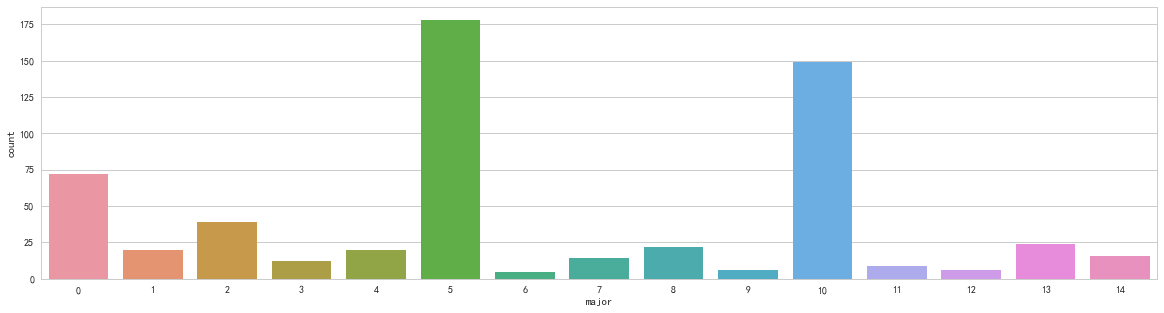

In [7]:
# 初始化
le = preprocessing.LabelEncoder()
le.fit(data['专业大类'])
data['major'] = le.transform(data['专业大类'])
ax = plt.subplots(figsize=(20, 5))
print(data.info())
sns.countplot(x='major', data=data)
print(le.inverse_transform(range(12)))

### 3.主要出行方式
- 校内主要出行方式6种，其中3可以表示为[0,0,1,0,0,0,0]
- 校外主要出行方式10种，其中3-8-9可表示为[0,0,1,0,0,0,0,1,1,0]

Text(0.5,0,'校外主要出行方式')

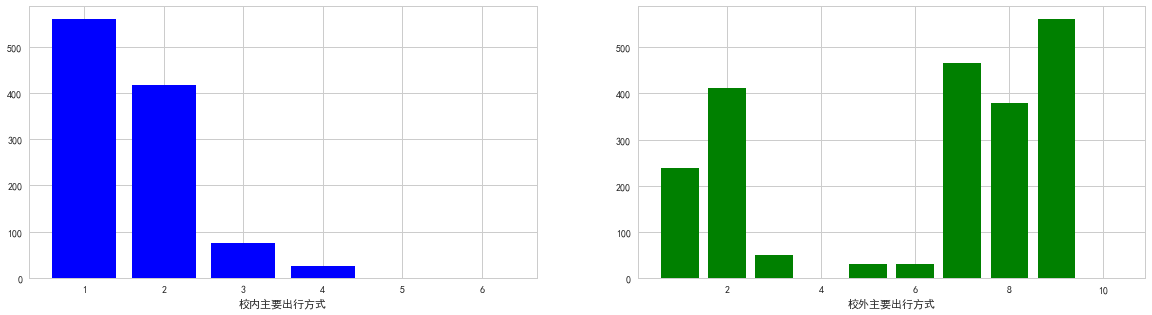

In [8]:
main_mode_in_college = np.zeros(7)
main_mode_out_college = np.zeros(11)
main_in_college = np.zeros((data.shape[0], 7))
main_out_college = np.zeros((data.shape[0], 11))
lines = data.shape[0]
for i in range(lines):
    in_college, out_college = data.loc[i, ['校内主要出行方式', '校外主要出行方式']]
    in_colleges = in_college.split('-')
    out_colleges = out_college.split('-')
    for mode in in_colleges:
        main_mode_in_college[int(mode)] += 1
        main_in_college[i, int(mode)] = 1
    for mode in out_colleges:
        main_mode_out_college[int(mode)] += 1
        main_out_college[i, int(mode)] = 1
    
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(20, 5))
axis1.bar(list(range(7))[1:], main_mode_in_college[1:], color='b')
axis1.set_xlabel('校内主要出行方式')
axis2.bar(list(range(11))[1:], main_mode_out_college[1:], color='g')
axis2.set_xlabel('校外主要出行方式')

- 校内出行方式集中于步行，自行车，部分同学为校览车
- 校外出行方式集中于公交车，出粗车，地铁，同时步行和自行车也占很大比例

In [9]:
for i in range(6):
    name = 'in' + str(i+1)
    data[name] = main_in_college[:, i+1]
for j in range(10):
    name = 'out' + str(j+1)
    data[name] = main_out_college[:, j+1]
data.head()

,Unnamed: 0,用户ID,星期,日期,Trip_ID,出行目的,第几次出行,出发地点,到达地点,出发时间,...,out1,out2,out3,out4,out5,out6,out7,out8,out9,out10
0,0,04D0BF86-23A4-498C-8DAD-1984B238772C,Thu,2018/04/17,04D0BF86-23A4-498C-8DAD-1984B238772C0001,4,1,翠柏二舍,安中大楼B,7:40,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,1,04D0BF86-23A4-498C-8DAD-1984B238772C,Thu,2018/04/17,04D0BF86-23A4-498C-8DAD-1984B238772C0002,3,2,安中大楼B,风味食堂,11:15,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2,2,04D0BF86-23A4-498C-8DAD-1984B238772C,Thu,2018/04/17,04D0BF86-23A4-498C-8DAD-1984B238772C0003,6,3,风味食堂,翠柏二舍,11:40,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,3,04D0BF86-23A4-498C-8DAD-1984B238772C,Thu,2018/04/17,04D0BF86-23A4-498C-8DAD-1984B238772C0004,4,4,翠柏二舍,安中大楼B,14:15,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,4,04D0BF86-23A4-498C-8DAD-1984B238772C,Thu,2018/04/17,04D0BF86-23A4-498C-8DAD-1984B238772C0005,2,5,安中大楼B,西2,14:37,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0


### 4.处理年龄
- 使年龄从1开始

C:\Users\yuhao\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


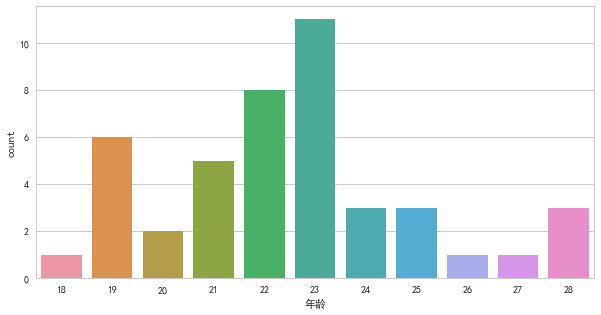

In [10]:
ax = plt.subplots(figsize=(10, 5))
sns.countplot(x='年龄', data=person)

In [11]:
def get_age(age):
    new_age = int(age) - 18
    return new_age
data['age'] = data['年龄'].apply(get_age)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592 entries, 0 to 591
Data columns (total 63 columns):
Unnamed: 0    592 non-null int64
用户ID          592 non-null object
星期            592 non-null object
日期            592 non-null object
Trip_ID       592 non-null object
出行目的          592 non-null int64
第几次出行         592 non-null int64
出发地点          592 non-null object
到达地点          592 non-null object
出发时间          592 non-null object
达到时间          592 non-null object
出发时           592 non-null int64
出发分           592 non-null int64
到达时           592 non-null int64
到达分           592 non-null int64
出行时间          592 non-null int64
出行方式总数        592 non-null int64
主要出行方式        592 non-null int64
出行方式1         592 non-null int64
用时1           592 non-null int64
出行方式2         592 non-null object
用时2           592 non-null object
出行方式3         592 non-null object
用时3           592 non-null object
出行方式4         592 non-null object
用时4           592 non-null object
路线            592 non-n

## 生成训练数据
- 整合特征变量

In [12]:
train_data = data.loc[:, ['出行目的', 'time', '性别', 'age', '宿舍区', '年级', 'major', '自行车保有', '电动车保有', '汽车保有',
                          'in1', 'in2', 'in3', 'in4', 'in5', 'in6',
                          'out1', 'out2', 'out3', 'out4', 'out5', 'out6', 'out7', 'out8', 'out9', 'out10',
                          '主要出行方式']]
train_data.head()

,出行目的,time,性别,age,宿舍区,年级,major,自行车保有,电动车保有,汽车保有,...,out2,out3,out4,out5,out6,out7,out8,out9,out10,主要出行方式
0,4,0,1,5,4,6,5,2,2,2,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1
1,3,3,1,5,4,6,5,2,2,2,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1
2,6,4,1,5,4,6,5,2,2,2,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1
3,4,6,1,5,4,6,5,2,2,2,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1
4,2,6,1,5,4,6,5,2,2,2,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1


In [13]:
# 特征还要加上校内外主要出行方式的向量表示方法
y = np.array(train_data['主要出行方式'])
y.astype('int')

x = np.array(train_data.loc[:, ['出行目的', 'time', '性别', 'age', '宿舍区', '年级', 'major', '自行车保有', '电动车保有', '汽车保有',
                          'in1', 'in2', 'in3', 'in4', 'in5', 'in6',
                          'out1', 'out2', 'out3', 'out4', 'out5', 'out6', 'out7', 'out8', 'out9', 'out10',]])
x.astype('int')

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [14]:
print(y_train.shape)
print('###############################################')
print(x_train.shape)

(444,)
###############################################
(444, 26)


### 逻辑回归

In [15]:
lr = LogisticRegression(C=1.0, penalty='l1', tol=0.0001, solver='liblinear')
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)
lr.fit(x_train_std, y_train)
score_of_lr = lr.score(x_test_std, y_test)
result = lr.predict(x_test_std)
prob = lr.predict_proba(x_test_std)
print(score_of_lr)
print(lr.coef_)

0.668918918918919
[[-0.04105169  0.04375446  0.08921556 -0.24946257  0.29363011  1.01882796
  -0.18317422  0.08415107 -0.05604462  0.          0.88824903 -0.34087428
  -0.28522596 -0.36424663  0.          0.         -0.01613783 -0.14176695
   0.          0.         -0.2002257   0.1409732   0.03887462  0.30069461
  -0.04311382  0.        ]
 [ 0.03357756 -0.11737954 -0.11442797  0.43646585 -0.28152595 -0.92136798
   0.22556838 -0.23431908  1.15404079  0.         -0.55052139  0.39752852
   0.          0.32407338  0.          0.          0.01434649  0.32918846
   0.          0.          0.25220388 -0.06345414 -0.14210888 -0.42039735
   0.07486779  0.        ]
 [ 0.          0.20878003  0.          0.         -0.2375937  -0.04523336
   0.          0.         -0.78790597  0.         -0.66533682  0.
   0.97058407  0.          0.          0.          0.         -0.57809088
   0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.         -0.25969381  0.

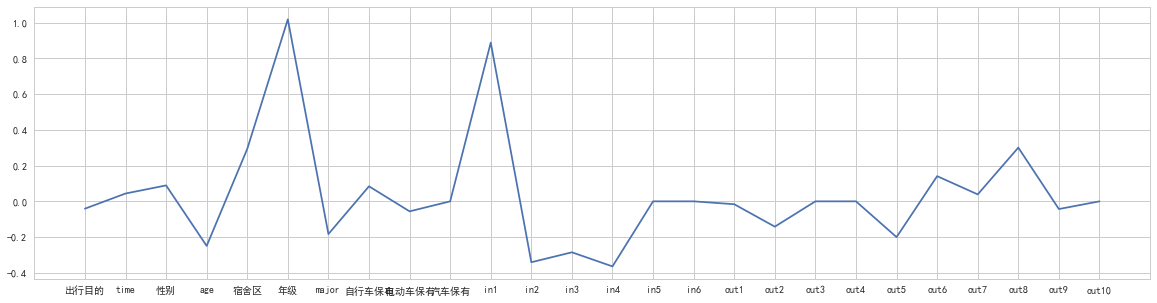

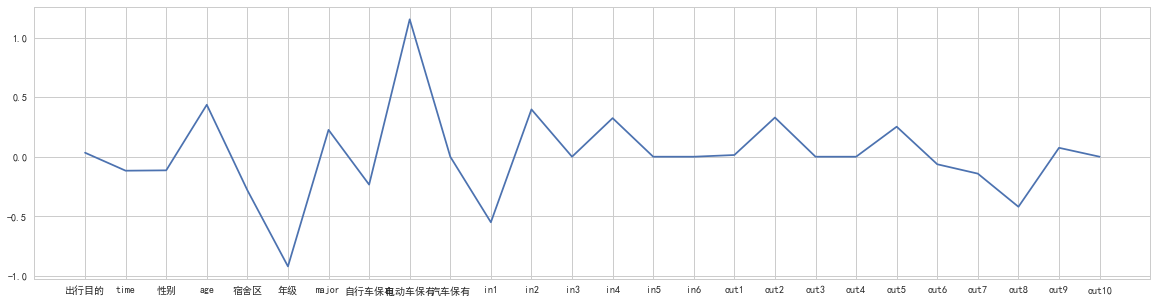

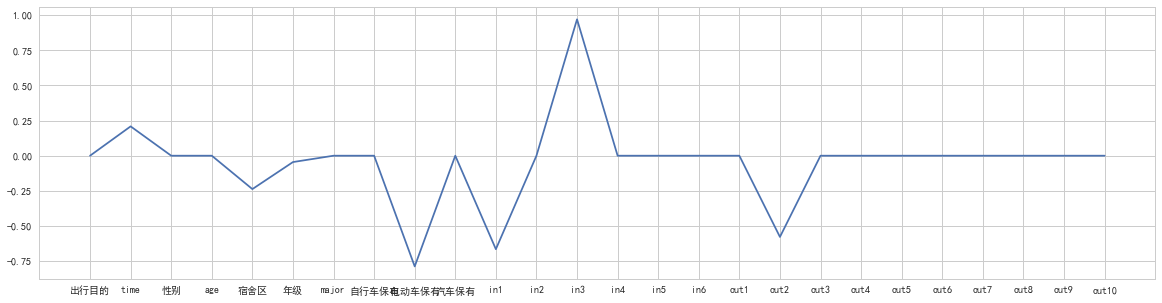

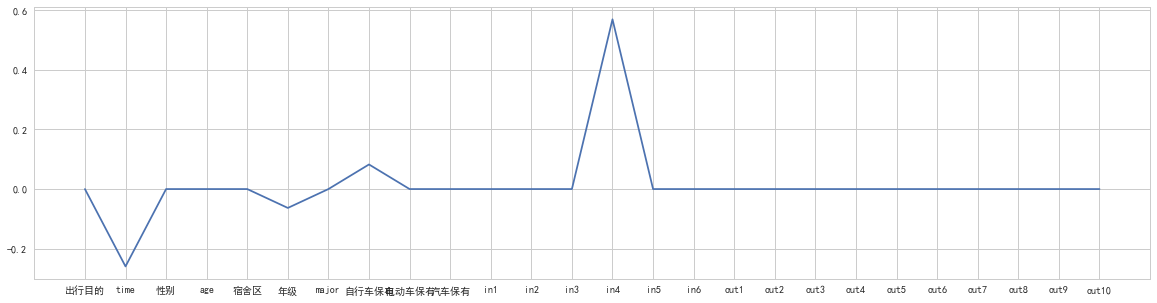

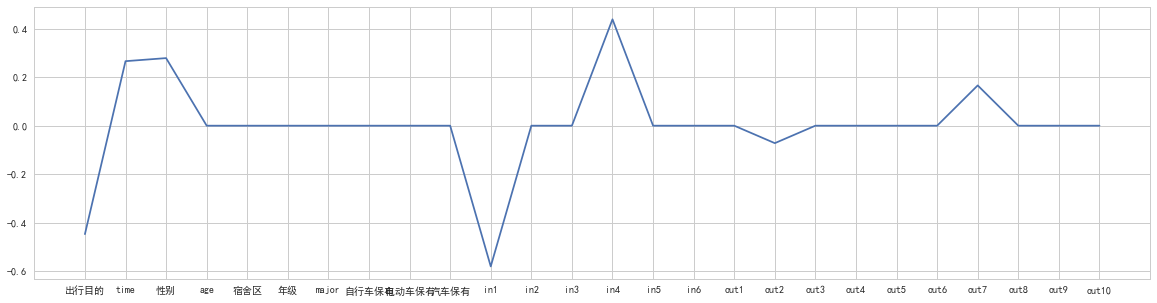

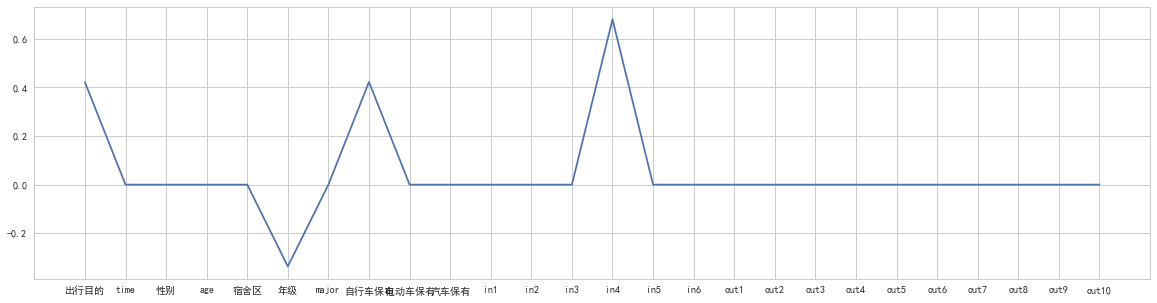

In [16]:
# 权重
weights = lr.coef_
x = ['出行目的', 'time', '性别', 'age', '宿舍区', '年级', 'major', '自行车保有', '电动车保有', '汽车保有',
                          'in1', 'in2', 'in3', 'in4', 'in5', 'in6',
                          'out1', 'out2', 'out3', 'out4', 'out5', 'out6', 'out7', 'out8', 'out9', 'out10']
for i in range(6):
    plt.figure(figsize=(20, 5))
    plt.plot(weights[i].transpose())
    plt.xticks(list(range(26)), x)

### 支持向量机

In [17]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC(random_state=0)
lsvc.fit(x_train_std, y_train)
score_of_svc = lsvc.score(x_test_std, y_test)
print(score_of_svc)
print(lsvc.coef_)
print(lsvc.intercept_ )

0.6824324324324325
[[-0.01965717  0.03029641  0.06405504 -0.20630487  0.10552161  0.46899213
  -0.09969877  0.02316705 -0.10255706  0.          0.3343272  -0.09895261
  -0.19877231 -0.16276344  0.          0.         -0.040151   -0.03282481
   0.10234878  0.         -0.08197028  0.06256758  0.04241189  0.08615667
  -0.00674486  0.        ]
 [ 0.02154968 -0.05463748 -0.08089327  0.21236566 -0.10773763 -0.39363253
   0.1167203  -0.09687843  0.34564257  0.         -0.23483657  0.10412848
   0.00438324  0.13121948  0.          0.          0.04660513  0.08968364
  -0.06779579  0.          0.1152097  -0.02474104 -0.06214383 -0.12517731
   0.02767383  0.        ]
 [-0.01950343  0.15517569 -0.03175041 -0.14649073 -0.05165049 -0.07723068
  -0.13226632  0.21661795 -0.14821118  0.         -0.2013113  -0.00709364
   0.32126112 -0.14211734  0.          0.          0.18214562 -0.23431821
   0.02895568  0.         -0.05243928 -0.05352401 -0.02484046  0.06673515
   0.1620062   0.        ]
 [-0.0222264

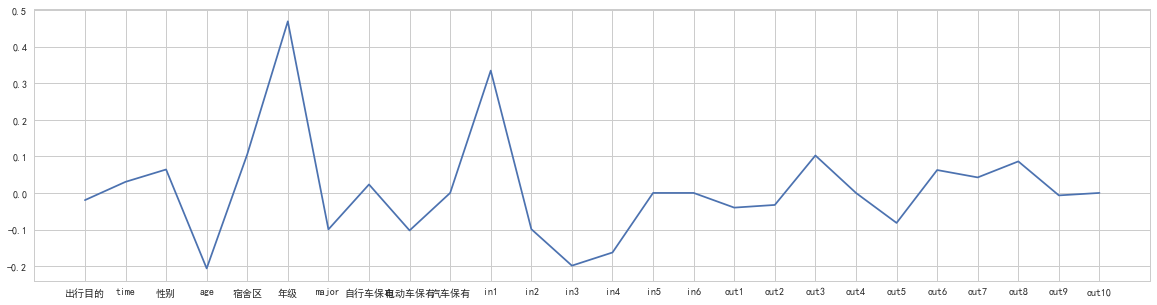

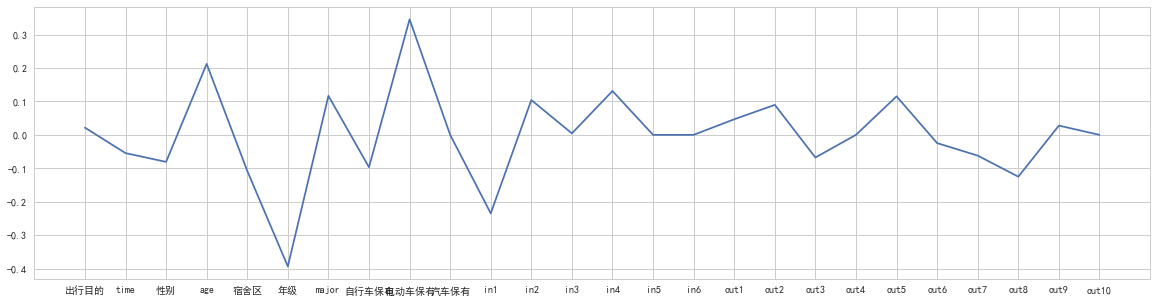

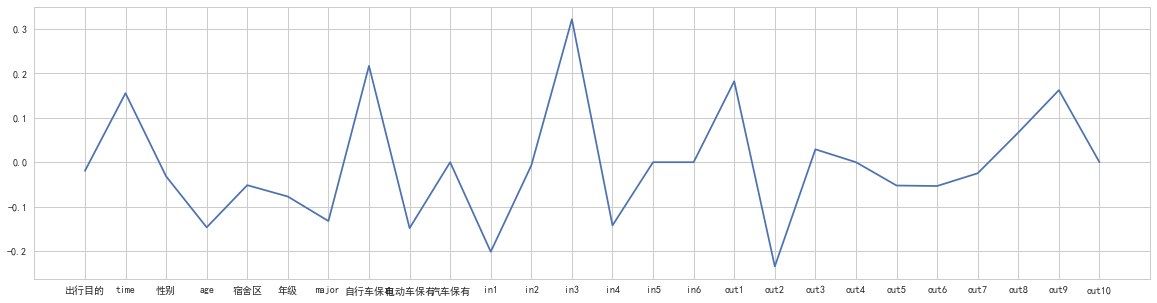

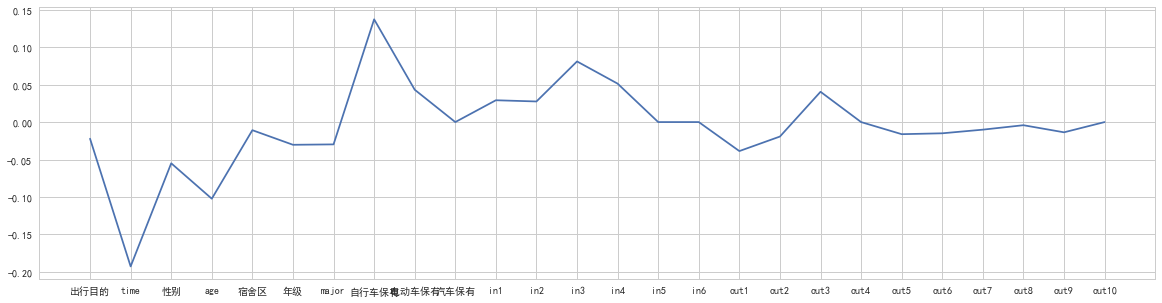

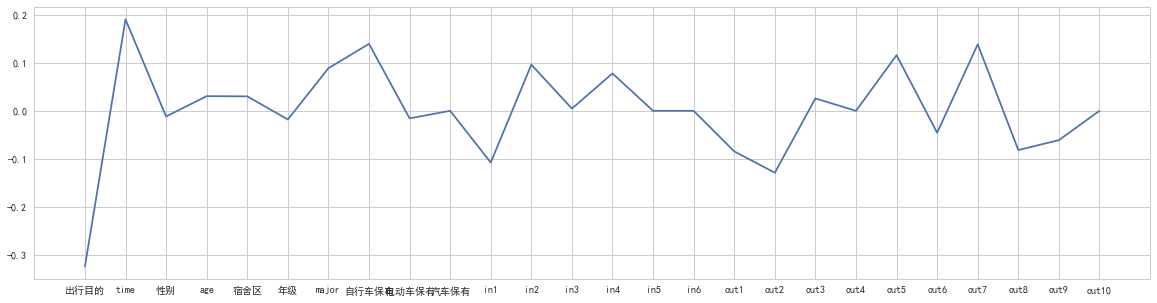

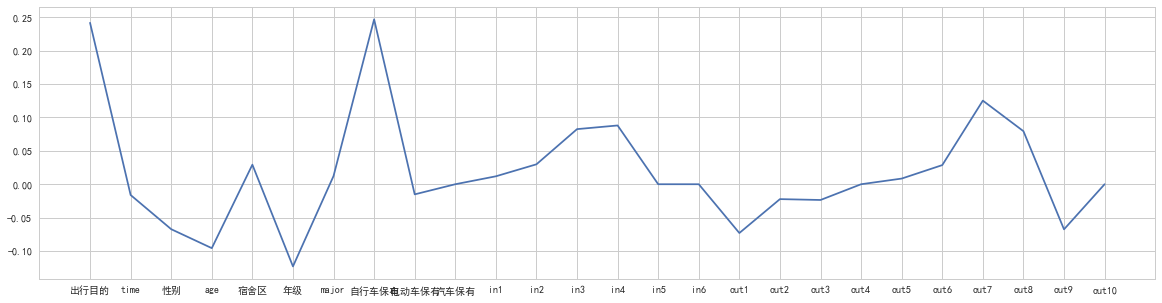

In [18]:
weights = lsvc.coef_
x = ['出行目的', 'time', '性别', 'age', '宿舍区', '年级', 'major', '自行车保有', '电动车保有', '汽车保有',
                          'in1', 'in2', 'in3', 'in4', 'in5', 'in6',
                          'out1', 'out2', 'out3', 'out4', 'out5', 'out6', 'out7', 'out8', 'out9', 'out10']
for i in range(6):
    plt.figure(figsize=(20, 5))
    plt.plot(weights[i].transpose())
    plt.xticks(list(range(26)), x)

### 随机森林

0.7094594594594594


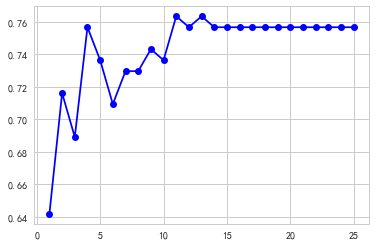

In [19]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=6, random_state=0)
rfc.fit(x_train_std, y_train)
score_of_rfc = rfc.score(x_test_std, y_test)
print(score_of_rfc)
scores = [0]
for i in range(1, 26):
    rfc = RandomForestClassifier(max_depth=i, random_state=0)
    rfc.fit(x_train_std, y_train)
    scores.append(rfc.score(x_test_std, y_test))
plt.plot(list(range(26))[1:], scores[1:], 'bo-')

当max_depth深度为5是，正确率最高

In [20]:
rfc = RandomForestClassifier(max_depth=5, random_state=0)
rfc.fit(x_train_std, y_train)
score_of_rfc = rfc.score(x_test_std, y_test)
print(score_of_rfc)
print(rfc.feature_importances_)

0.7364864864864865
[5.66257483e-02 1.23328690e-01 1.84887395e-02 2.21383845e-01
 9.10893691e-02 1.99241259e-02 5.18075710e-02 4.83773297e-02
 3.45379758e-02 0.00000000e+00 4.15320220e-02 4.52801505e-02
 7.31274437e-02 2.96174035e-02 0.00000000e+00 0.00000000e+00
 1.03036248e-02 4.19642781e-02 1.60927877e-02 0.00000000e+00
 1.08817370e-02 2.06134415e-04 4.55744986e-02 1.78088265e-02
 2.04769845e-03 0.00000000e+00]


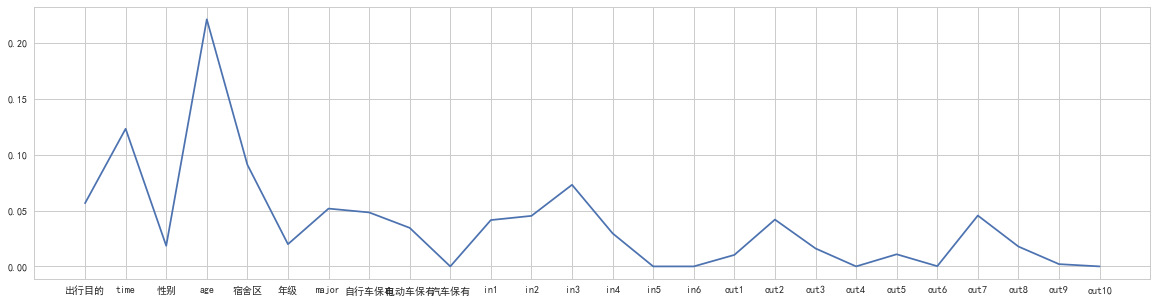

In [21]:
weights = rfc.feature_importances_
x = ['出行目的', 'time', '性别', 'age', '宿舍区', '年级', 'major', '自行车保有', '电动车保有', '汽车保有',
                          'in1', 'in2', 'in3', 'in4', 'in5', 'in6',
                          'out1', 'out2', 'out3', 'out4', 'out5', 'out6', 'out7', 'out8', 'out9', 'out10']
plt.figure(figsize=(20, 5))
plt.plot(weights)
plt.xticks(list(range(26)), x);

In [23]:
data['major']

0      5
1      5
2      5
3      5
4      5
5      5
6      5
7      5
8      5
9      5
10     5
11     5
12     5
13     5
14     5
15     5
16     5
17     5
18     5
19     5
20     5
21     5
22     5
23     5
24     5
25     5
26     2
27     2
28     2
29     2
      ..
562    8
563    8
564    8
565    8
566    8
567    8
568    8
569    8
570    8
571    8
572    8
573    8
574    8
575    8
576    5
577    5
578    5
579    5
580    5
581    5
582    5
583    5
584    5
585    5
586    5
587    5
588    5
589    5
590    5
591    5
Name: major, Length: 592, dtype: int64